In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cbrain.imports import *
limit_mem()
from cbrain.utils import *
from cbrain.normalization import conversion_dict
from cbrain.data_generator import DataGenerator
from cbrain.model_diagnostics import *
from cbrain.cam_constants import *

In [3]:
mds = {}

In [4]:
exps = ['006_8col_pnas_exact', '007_32col_pnas_exact', '008_8col_pnas_exact_cut.yml', '009_32col_pnas_exact_cut.yml']

In [5]:
mds['006_8col_pnas_exact'] = ModelDiagnostics(
    '../../nn_config/006_8col_pnas_exact.yml', 
    '/local/S.Rasp/preprocessed_data/001_valid.nc'
)
mds['007_32col_pnas_exact'] = ModelDiagnostics(
    '../../nn_config/007_32col_pnas_exact.yml', 
    '/local/S.Rasp/preprocessed_data/003_valid.nc'
)
mds['008_8col_pnas_exact_cut'] = ModelDiagnostics(
    '../../nn_config/008_8col_pnas_exact_cut.yml', 
    '/local/S.Rasp/preprocessed_data/001_valid.nc'
)
mds['009_32col_pnas_exact_cut'] = ModelDiagnostics(
    '../../nn_config/009_32col_pnas_exact_cut.yml', 
    '/local/S.Rasp/preprocessed_data/003_valid.nc'
)

## Test the difference in skill

In [6]:
mds['007_32col_pnas_exact'].compute_stats(250)
mds['009_32col_pnas_exact_cut'].compute_stats(250)

/filer/z-sv-pool12c/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/stephans-devlog/cbrain/model_diagnostics.py:131: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/filer/z-sv-pool12c/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/stephans-devlog/cbrain/model_diagnostics.py:131: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/filer/z-sv-pool12c/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/stephans-devlog/cbrain/model_diagnostics.py:137: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [7]:
vars = ['TPHYSTND', 'PHQ']

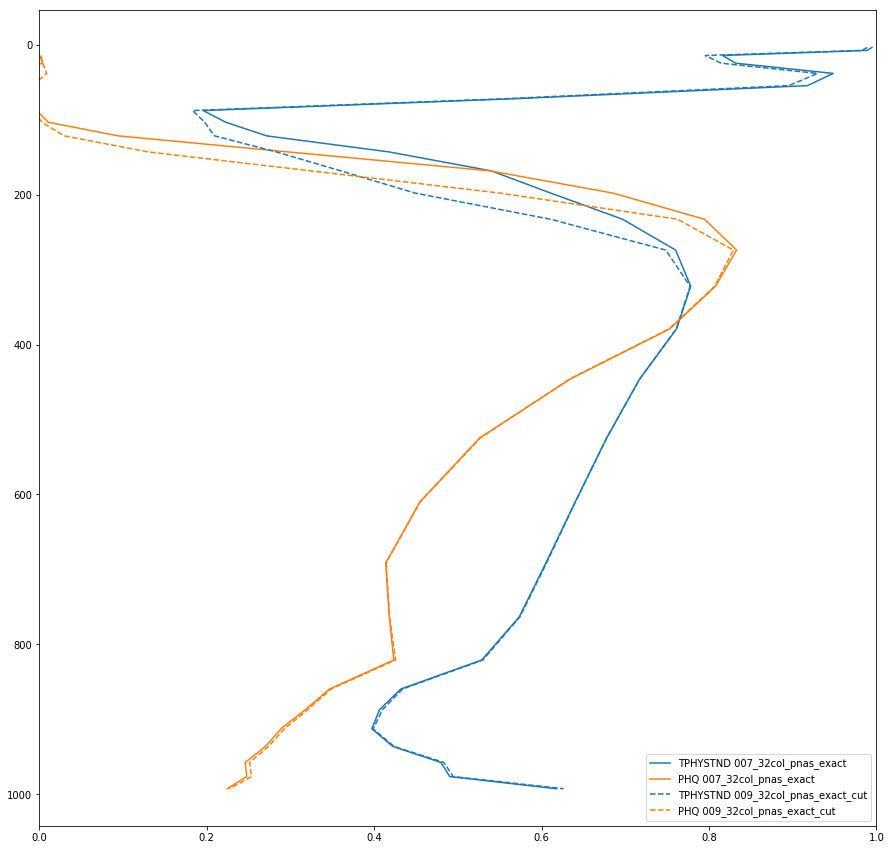

In [8]:
cols = sns.color_palette(n_colors=7)
fig, ax = plt.subplots(figsize=(15, 15))
for i, (exp, sty) in enumerate(zip(['007_32col_pnas_exact', '009_32col_pnas_exact_cut'], ['-','--', ':', '-.'])):
    md = mds[exp]
    for v, c in zip(vars, cols):
        if v in md.valid_gen.output_vars:
            ax.plot(md.stats['hor_r2'][md.get_output_var_idx(v)], P, label=v+' '+exp, ls=sty, c=c)
ax.set_xlim(0, 1)
ax.invert_yaxis()
plt.legend()

## Compare the Jacobians

### 8 columns

In [9]:
X_mean = get_mean_sounding(mds['006_8col_pnas_exact'], slice(33,34))
X_mean_cut = get_mean_sounding(mds['008_8col_pnas_exact_cut'], slice(33,34))

In [10]:
J = get_jacobian(X_mean, mds['006_8col_pnas_exact'].model)
J_cut = get_jacobian(X_mean_cut, mds['008_8col_pnas_exact_cut'].model)

/home/s/S.Rasp/miniconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/s/S.Rasp/miniconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [19]:
J.shape, J_cut.shape

((65, 94), (65, 66))

In [11]:
# Normalize
J = J / mds['006_8col_pnas_exact'].valid_gen.input_transform.div
J_cut = J_cut / mds['008_8col_pnas_exact_cut'].valid_gen.input_transform.div

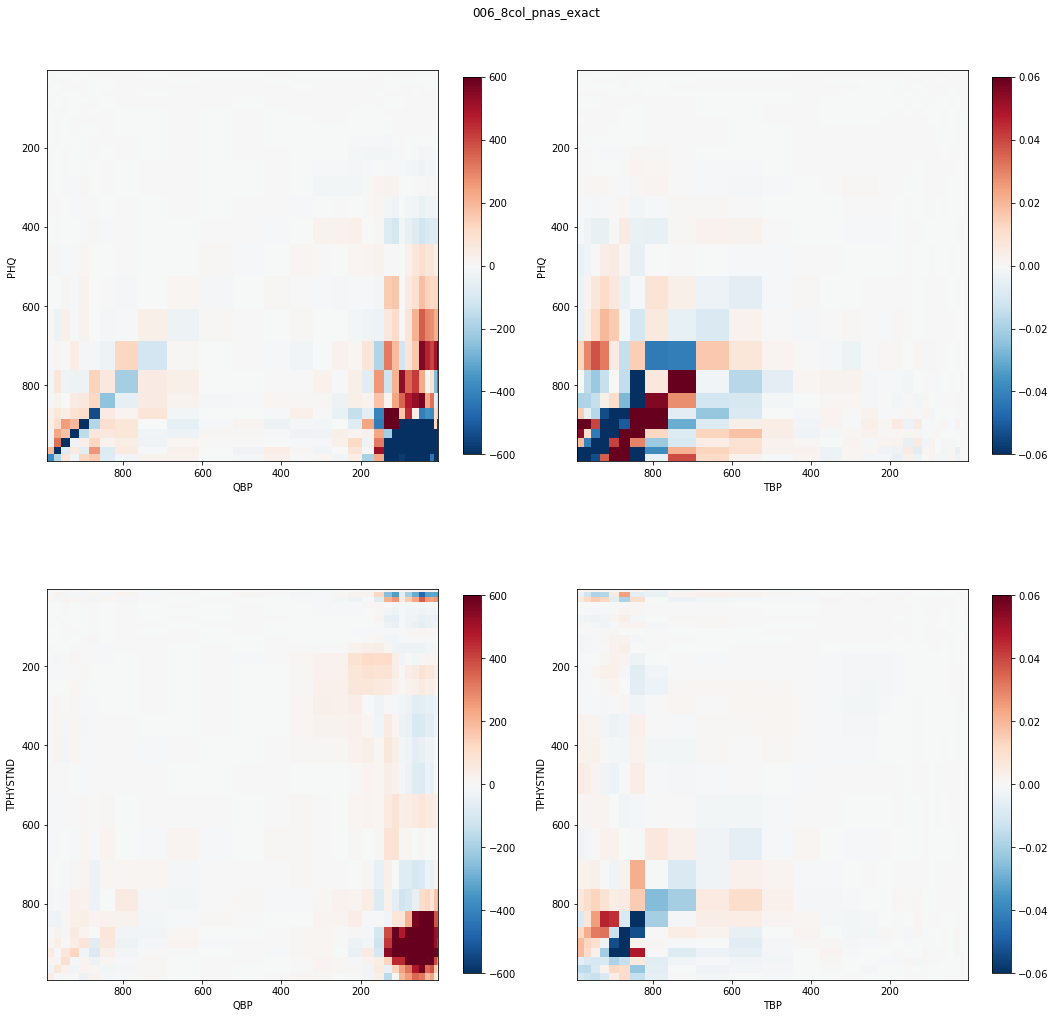

In [12]:
md = mds['006_8col_pnas_exact']
fig, axs = plt.subplots(2, 2, figsize=(15,15))
plot_jacobian(J, md.valid_gen, inp_var='QBP', out_var='PHQ', cmap='RdBu_r', vmin=-600, vmax=600, ax=axs[0,0])
plot_jacobian(J, md.valid_gen, inp_var='TBP', out_var='PHQ', cmap='RdBu_r', vmin=-6e-2, vmax=6e-2, ax=axs[0,1])
plot_jacobian(J, md.valid_gen, inp_var='QBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-600, vmax=600, ax=axs[1,0])
plot_jacobian(J, md.valid_gen, inp_var='TBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-6e-2, vmax=6e-2, ax=axs[1,1])
plt.suptitle('006_8col_pnas_exact')
plt.tight_layout()

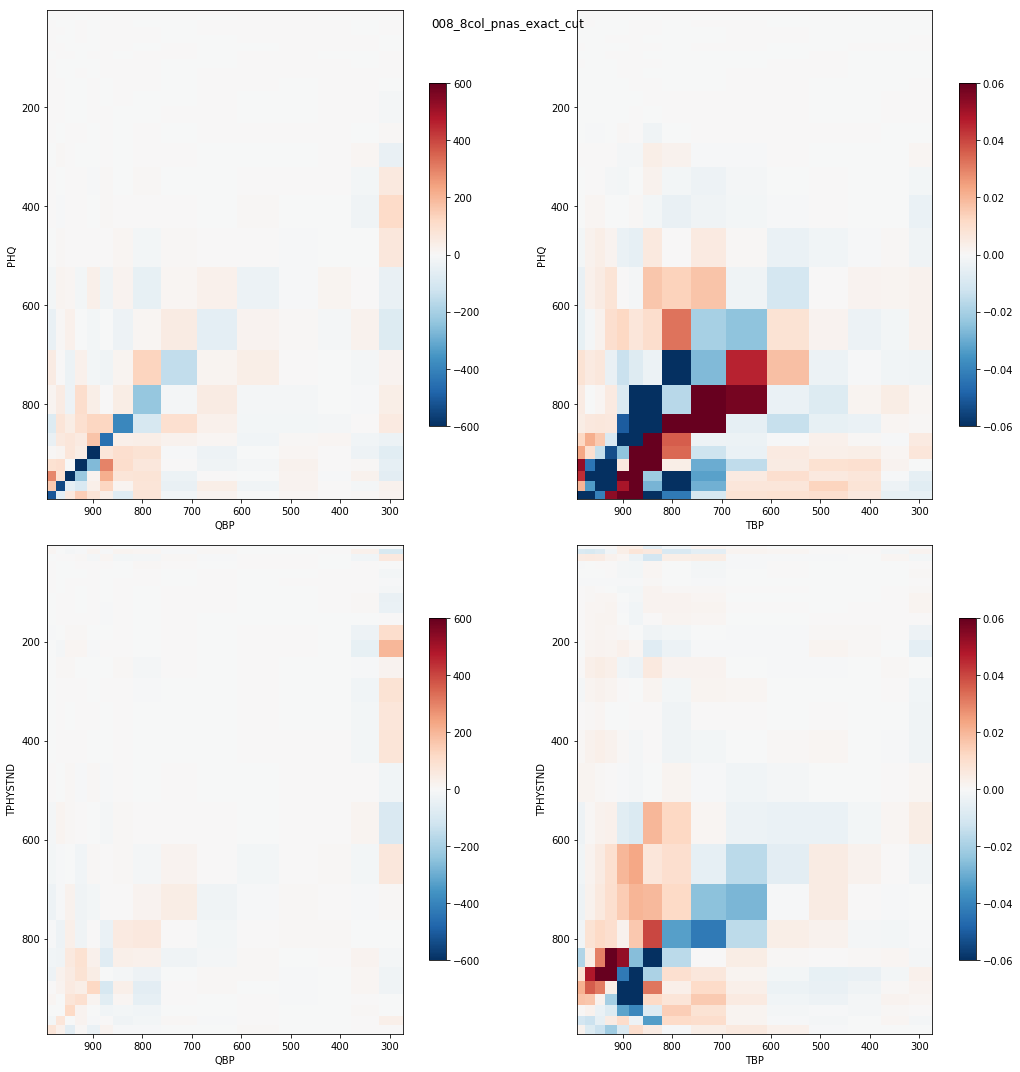

In [13]:
md = mds['008_8col_pnas_exact_cut']
fig, axs = plt.subplots(2, 2, figsize=(15,15))
plot_jacobian(J_cut, md.valid_gen, inp_var='QBP', out_var='PHQ', cmap='RdBu_r', vmin=-600, vmax=600, ax=axs[0,0])
plot_jacobian(J_cut, md.valid_gen, inp_var='TBP', out_var='PHQ', cmap='RdBu_r', vmin=-6e-2, vmax=6e-2, ax=axs[0,1])
plot_jacobian(J_cut, md.valid_gen, inp_var='QBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-600, vmax=600, ax=axs[1,0])
plot_jacobian(J_cut, md.valid_gen, inp_var='TBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-6e-2, vmax=6e-2, ax=axs[1,1])
plt.suptitle('008_8col_pnas_exact_cut')
plt.tight_layout()

### 32 columns

In [14]:
X_mean = get_mean_sounding(mds['007_32col_pnas_exact'], slice(33,34))
X_mean_cut = get_mean_sounding(mds['009_32col_pnas_exact_cut'], slice(33,34))

In [15]:
J = get_jacobian(X_mean, mds['007_32col_pnas_exact'].model)
J_cut = get_jacobian(X_mean_cut, mds['009_32col_pnas_exact_cut'].model)

/home/s/S.Rasp/miniconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/s/S.Rasp/miniconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [16]:
# Normalize
J = J / mds['007_32col_pnas_exact'].valid_gen.input_transform.div
J_cut = J_cut / mds['009_32col_pnas_exact_cut'].valid_gen.input_transform.div

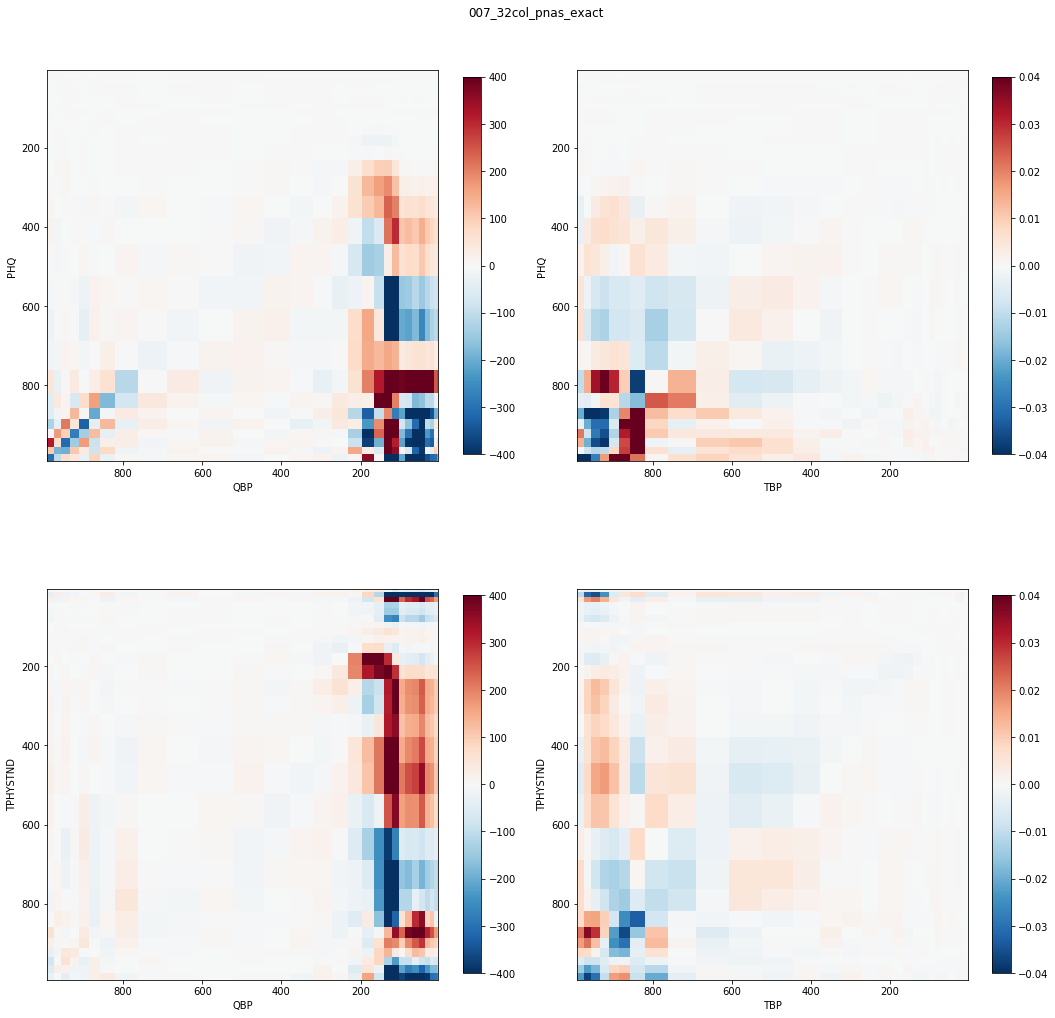

In [17]:
md = mds['007_32col_pnas_exact']
fig, axs = plt.subplots(2, 2, figsize=(15,15))
plot_jacobian(J, md.valid_gen, inp_var='QBP', out_var='PHQ', cmap='RdBu_r', vmin=-400, vmax=400, ax=axs[0,0])
plot_jacobian(J, md.valid_gen, inp_var='TBP', out_var='PHQ', cmap='RdBu_r', vmin=-4e-2, vmax=4e-2, ax=axs[0,1])
plot_jacobian(J, md.valid_gen, inp_var='QBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-400, vmax=400, ax=axs[1,0])
plot_jacobian(J, md.valid_gen, inp_var='TBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-4e-2, vmax=4e-2, ax=axs[1,1])
plt.suptitle('007_32col_pnas_exact')
plt.tight_layout()

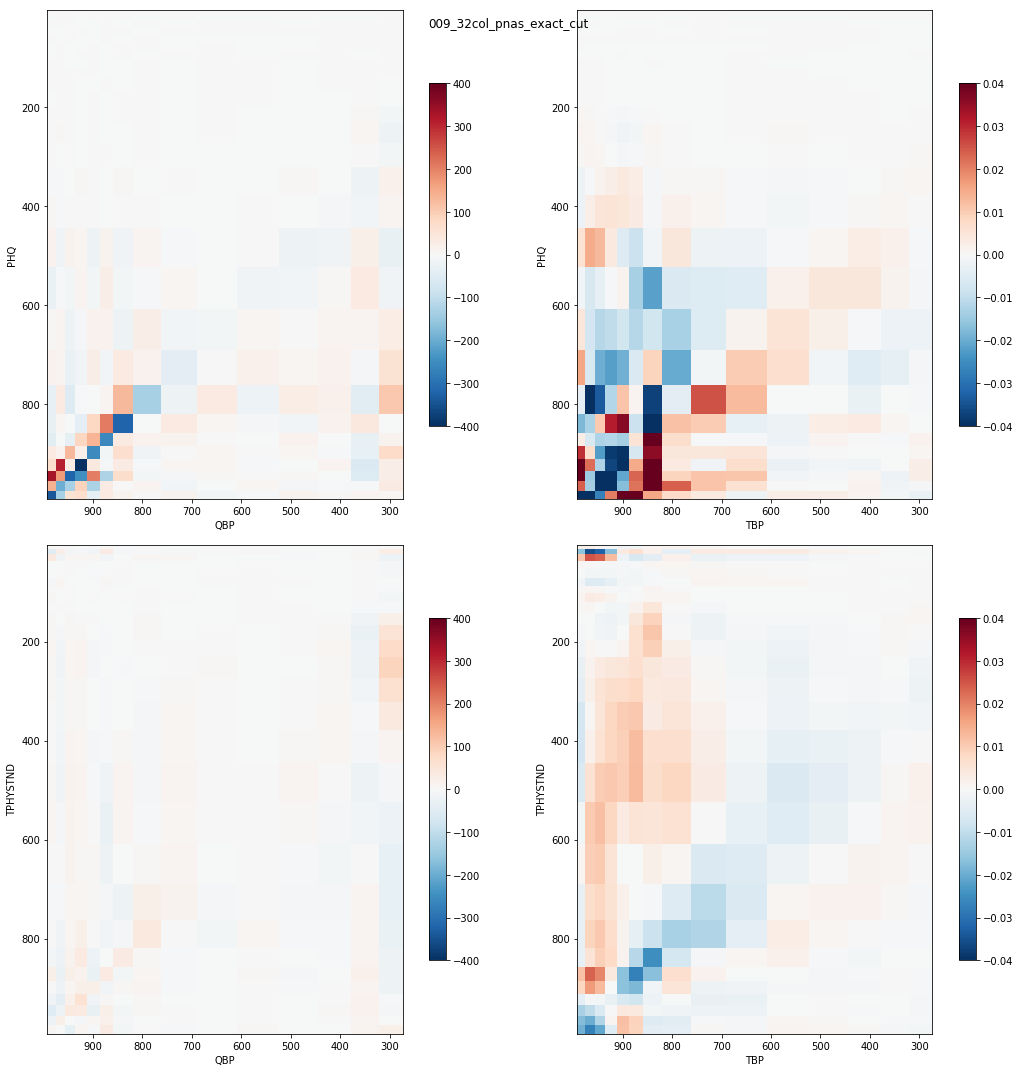

In [18]:
md = mds['009_32col_pnas_exact_cut']
fig, axs = plt.subplots(2, 2, figsize=(15,15))
plot_jacobian(J_cut, md.valid_gen, inp_var='QBP', out_var='PHQ', cmap='RdBu_r', vmin=-400, vmax=400, ax=axs[0,0])
plot_jacobian(J_cut, md.valid_gen, inp_var='TBP', out_var='PHQ', cmap='RdBu_r', vmin=-4e-2, vmax=4e-2, ax=axs[0,1])
plot_jacobian(J_cut, md.valid_gen, inp_var='QBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-400, vmax=400, ax=axs[1,0])
plot_jacobian(J_cut, md.valid_gen, inp_var='TBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-4e-2, vmax=4e-2, ax=axs[1,1])
plt.suptitle('009_32col_pnas_exact_cut')
plt.tight_layout()